In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
data_to_load = "Resources/speed dating data.csv"

# Read Data

data = pd.read_csv(data_to_load, encoding="ISO-8859-1")
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [2]:
sd_csv = "Resources/speed dating data.csv"
ind_df = pd.read_csv(sd_csv, encoding="ISO-8859-1")
par_df = pd.read_csv(sd_csv, encoding="ISO-8859-1")

clean_ind = ind_df.copy()
clean_ind = clean_ind[["iid","pid","match","career_c","match_es"]]
clean_ind.head()

clean_par = par_df.copy()
clean_par = clean_par[["iid","pid","match","career_c","match_es"]]
clean_par.head()

combo_df = pd.merge(clean_ind,clean_par, left_on = 'iid',right_on='pid')
combo_df = combo_df[combo_df['pid_x'] == combo_df['iid_y']]
combo_df

found = []
found_sets = []
for x, y in zip(combo_df['pid_x'], combo_df['iid_x']):
    if set([x, y]) in found_sets:
        found.append(False)
    else:
        found.append(True)
        found_sets.append(set([x, y]))
combo_df = combo_df[found]

combo_df.head()

,iid_x,pid_x,match_x,career_c_x,match_es_x,iid_y,pid_y,match_y,career_c_y,match_es_y
0,1,11.0,0,NaN,4.0,11,1.0,0,2.0,0.0
11,1,12.0,0,NaN,4.0,12,1.0,0,1.0,3.0
22,1,13.0,1,NaN,4.0,13,1.0,1,1.0,NaN
33,1,14.0,1,NaN,4.0,14,1.0,1,1.0,NaN
44,1,15.0,1,NaN,4.0,15,1.0,1,1.0,NaN


In [3]:
# combo_df.count()
data_drop = combo_df[pd.notnull(combo_df['career_c_x'])]
data_drop.head()

,iid_x,pid_x,match_x,career_c_x,match_es_x,iid_y,pid_y,match_y,career_c_y,match_es_y
300,4,11.0,0,1.0,2.0,11,4.0,0,2.0,0.0
311,4,12.0,0,1.0,2.0,12,4.0,0,1.0,3.0
322,4,13.0,0,1.0,2.0,13,4.0,0,1.0,NaN
333,4,14.0,1,1.0,2.0,14,4.0,1,1.0,NaN
344,4,15.0,0,1.0,2.0,15,4.0,0,1.0,NaN


In [4]:
data_drop2 = data_drop.loc[data_drop["match_x"] == 1, :]
data_drop2.head()

,iid_x,pid_x,match_x,career_c_x,match_es_x,iid_y,pid_y,match_y,career_c_y,match_es_y
333,4,14.0,1,1.0,2.0,14,4.0,1,1.0,NaN
388,4,19.0,1,1.0,2.0,19,4.0,1,7.0,NaN
433,5,14.0,1,1.0,NaN,14,5.0,1,1.0,NaN
488,5,19.0,1,1.0,NaN,19,5.0,1,7.0,NaN
533,6,14.0,1,1.0,4.0,14,6.0,1,1.0,NaN


In [5]:
df_new = data_drop.groupby(['career_c_x', 'career_c_y']).count()
df_new.head()

iid_x  pid_x  match_x  match_es_x  iid_y  pid_y  \
career_c_x career_c_y                                                    
1.0        1.0            56     56       56          49     56     56   
           2.0            46     46       46          31     46     46   
           4.0            11     11       11          11     11     11   
           5.0            10     10       10           9     10     10   
           6.0            12     12       12           8     12     12   

                       match_y  match_es_y  
career_c_x career_c_y                       
1.0        1.0              56          37  
           2.0              46          37  
           4.0              11           9  
           5.0              10           9  
           6.0              12          11

In [6]:
df_new = df_new.reset_index()
df_new.columns

Index(['career_c_x', 'career_c_y', 'iid_x', 'pid_x', 'match_x', 'match_es_x',
       'iid_y', 'pid_y', 'match_y', 'match_es_y'],
      dtype='object')

In [7]:
clean_data = pd.DataFrame({"Career": df_new['career_c_x'],"Partner Career":df_new['career_c_y'],"Matches":df_new['match_x']})
clean_data.head()

,Career,Partner Career,Matches
0,1.0,1.0,56
1,1.0,2.0,46
2,1.0,4.0,11
3,1.0,5.0,10
4,1.0,6.0,12


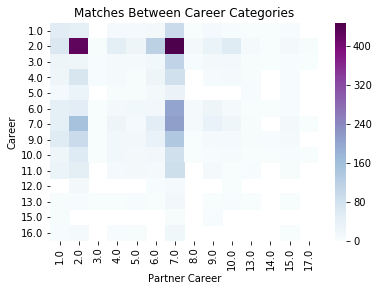

In [8]:
# import seaborn as sns
%matplotlib inline

import pandas as pd
import seaborn as sns
# import matplotlib as plt
import matplotlib.pyplot as plt

x = clean_data['Career']
y = clean_data['Partner Career']
z = clean_data['Matches']

data = pd.DataFrame(data={'Career':x, 'Partner Career':y, 'z':z})
data = data.pivot(index='Career', columns='Partner Career', values='z')
sns.heatmap(data, cmap="BuPu").set_title("Matches Between Career Categories")

plt.savefig("Matches Between Career Categories.png")
plt.savefig("Matches Between Career Categories.png",
transparent=False)
